# 4. Spatio-temporal diversity of Valais and Lavaux 2023 must 

In [5]:
#!mkdir /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/spatio-temporal/valais

In [68]:
workdir = '/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/spatio-temporal/valais'
%cd $workdir

/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/spatio-temporal/valais


In [69]:
%env TMPDIR=/scratch/lfloerl/tmpdata

env: TMPDIR=/scratch/lfloerl/tmpdata


In [70]:
from qiime2 import Visualization
import qiime2 as q2
from qiime2 import Visualization
from qiime2 import Artifact
from qiime2 import Metadata
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from qiime2.plugins.diversity.visualizers import alpha_group_significance


from qiime2.plugins import diversity as q2d

%matplotlib inline

In [71]:
md = Metadata.load('/home/lfloerl/microterroir/Microbiome/Metadata/ITS_Valais_and_Lavaux23.tsv')
taxonomy = q2.Artifact.load('/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/taxonomy.qza')

In [72]:
%%bash 

# filter the Feature Table to contain the Valais and Lavaux 2023 must samples 
qiime feature-table filter-samples \
    --i-table /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/phylum_filtered_table.qza \
    --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_Valais_and_Lavaux23.tsv \
    --o-filtered-table Valais_Lavaux23_filtered_table.qza

qiime feature-table summarize \
    --i-table /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/Valais_Lavaux23_filtered_table.qza \
    --o-visualization Valais_Lavaux23_filtered_table.qzv

Saved FeatureTable[Frequency] to: Valais_Lavaux23_filtered_table.qza
Saved Visualization to: Valais_Lavaux23_filtered_table.qzv


depth of 5000: Retained 630’000 (24.93%) features in 126 (98.44%) samples


In [73]:
Visualization.load('Valais_Lavaux23_filtered_table.qzv')

<visualization: Visualization uuid: b36bf17d-f5ed-4c10-b1d4-daa42e7237b7>

# Diversity 

In [74]:
# just use the same rarefaction depth for all sample types
depth = 10000 
threads = 10

In [75]:
table = q2.Artifact.load('Valais_Lavaux23_filtered_table.qza')

In [76]:
core_div_dict = {}
core_div = q2d.actions.core_metrics(table=table,
                                    sampling_depth=depth,
                                    metadata=md, 
                                    n_jobs=threads)
# save outputs
output_dir='valais_cm{0}/'.format(depth)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
for k, v in core_div.__dict__.items():
    if k != '_fields':
        v.save(output_dir + k)
        core_div_dict[k] = v

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/metadata/metadata.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  series[missing.index] = missing
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/metadata/metadata.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan na

In [77]:
Visualization.load(f'{workdir}/{output_dir}/bray_curtis_emperor.qzv')

<visualization: Visualization uuid: 0a383763-405e-4999-b1a7-86784d14eb83>

In [78]:
Visualization.load(f'{workdir}/{output_dir}/jaccard_emperor.qzv')

<visualization: Visualization uuid: 432a7282-62b8-44d5-aa33-67c3f33bd279>

## Kmerizer 

In [79]:
%%bash

qiime feature-table filter-seqs \
    --i-data /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/Sven-denoising-test/ITS/revcomp-trimmed-denoised/with-adjusted-parameters/ITS-revcomp-trimmed-ER-0.05-denoised-trunc-190-PFA-4.0-maxee-4.0-rep-seqs.qza \
    --i-table Valais_Lavaux23_filtered_table.qza \
    --o-filtered-data Valais_Lavaux23_filtered_rep_seqs.qza

qiime kmerizer core-metrics \
    --i-sequences Valais_Lavaux23_filtered_rep_seqs.qza \
    --i-table Valais_Lavaux23_filtered_table.qza \
    --p-sampling-depth 10000 \
    --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_Valais_and_Lavaux23.tsv \
    --p-n-jobs 'auto' \
    --output-dir valais_kmer_cm10000/

Saved FeatureData[Sequence] to: Valais_Lavaux23_filtered_rep_seqs.qza
Saved FeatureTable[Frequency] to: valais_kmer_cm10000/rarefied_table.qza
Saved FeatureTable[Frequency] to: valais_kmer_cm10000/kmer_table.qza
Saved SampleData[AlphaDiversity] to: valais_kmer_cm10000/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: valais_kmer_cm10000/shannon_vector.qza
Saved DistanceMatrix to: valais_kmer_cm10000/jaccard_distance_matrix.qza
Saved DistanceMatrix to: valais_kmer_cm10000/bray_curtis_distance_matrix.qza
Saved PCoAResults to: valais_kmer_cm10000/jaccard_pcoa_results.qza
Saved PCoAResults to: valais_kmer_cm10000/bray_curtis_pcoa_results.qza
Saved Visualization to: valais_kmer_cm10000/scatterplot.qzv


In [25]:
Visualization.load('valais_kmer_cm10000/scatterplot.qzv')

<visualization: Visualization uuid: 93509006-8878-46c2-bab3-259dff12f892>

### Alpha Group Significance 

In [26]:
# metrics: 
alpha_metrics = ['shannon_vector', 'observed_features_vector', 'evenness_vector']

for m in alpha_metrics:
    ags, = alpha_group_significance(alpha_diversity = core_div_dict[m],
                               metadata = md)
    ags.save(output_dir + 'alpha_groupSig_{0}.qzv'.format(m))

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/metadata/metadata.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  series[missing.index] = missing
/scratch/lfloerl/.condaenvs/qiime2-amplicon-

In [27]:
Visualization.load(f'{output_dir}/alpha_groupSig_evenness_vector.qzv')

<visualization: Visualization uuid: c07163eb-d1fc-4341-9c25-fea7e7e4cded>

In [28]:
Visualization.load(f'{output_dir}/alpha_groupSig_observed_features_vector.qzv')

<visualization: Visualization uuid: d302a589-d336-4204-9557-91b4b54777d2>

In [29]:
Visualization.load(f'{output_dir}/alpha_groupSig_shannon_vector.qzv')

<visualization: Visualization uuid: 94c76c40-928e-49a5-8f30-e948ccdabfa5>

### PERMANOVA

In [31]:
formula = 'Location * Variety'

beta_metrics = ['bray_curtis', 'jaccard']

# PERMANOVA with core metrics 
for m in beta_metrics:
    adonis_res, = q2d.actions.adonis(
        distance_matrix=core_div_dict[m + '_distance_matrix'],
        metadata=md,
        formula=formula,
        n_jobs=3)
    adonis_res.save(output_dir + 'adonis_{0}.qzv'.format(m))
    

# PERMANOVA with kmer core metrics 
kmer_dir = 'valais_kmer_cm10000'
    
for m in beta_metrics:
    !qiime diversity adonis \
        --i-distance-matrix "{kmer_dir}/{m}_distance_matrix.qza" \
        --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_Valais_and_Lavaux23.tsv \
        --p-formula "{formula}" \
        --p-n-jobs 5 \
        --o-visualization "{kmer_dir}/adonis_{m}.qzv"

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/metadata/metadata.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  series[missing.index] = missing
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/metadata/metadata.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan na

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /scratch/lfloerl/tmpdata/tmp026iwla0/dm.tsv /scratch/lfloerl/tmpdata/tmp026iwla0/md.tsv Location * Variety 999 3 /scratch/lfloerl/tmpdata/qiime2-temp-vqz9g545/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/metadata/metadata.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  series[missing.index] = missing
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/metadata/metadata.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an er

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /scratch/lfloerl/tmpdata/tmpo2wgxlk_/dm.tsv /scratch/lfloerl/tmpdata/tmpo2wgxlk_/md.tsv Location * Variety 999 3 /scratch/lfloerl/tmpdata/qiime2-temp-7tqd7lbq/adonis.tsv

R version 4.3.3 (2024-02-29) 


This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Saved Visualization to: valais_kmer_cm10000/adonis_bray_curtis.qzv
Saved Visualization to: valais_kmer_cm10000/adonis_jaccard.qzv


In [32]:
Visualization.load(f'{output_dir}/adonis_bray_curtis.qzv')

<visualization: Visualization uuid: f53884aa-48a3-4522-af86-93b57f4ecae5>

In [33]:
Visualization.load(f'{output_dir}/adonis_jaccard.qzv')

<visualization: Visualization uuid: 9074c97d-4783-4c69-b639-7d77e0b879dc>

In [34]:
Visualization.load(f'{kmer_dir}/adonis_bray_curtis.qzv')

<visualization: Visualization uuid: 2d36a06e-ac4e-43e0-8ce8-d75e19266028>

In [35]:
Visualization.load(f'{kmer_dir}/adonis_jaccard.qzv')

<visualization: Visualization uuid: 7cefbdb1-5276-4c4f-ac8b-200f98b4f191>

## Mantel 

In [80]:
import sys
sys.path.append('/home/lfloerl/microterroir/Microbiome/ITS/spatio-temporal/')
from mantel_ITS import mantel_test_and_plot

In [85]:
%%bash 

div_dir='valais_cm10000'
kmer_dir='valais_kmer_cm10000'

# geodisic distance
qiime tools export --input-path /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/geodesic_distance_Valais_ITS.qza --output-path geodesic_distance_ITS_ValaisLavaux

# distance matrices 
qiime tools export --input-path $div_dir/bray_curtis_distance_matrix.qza --output-path $div_dir/bray_curtis_distance_matrix
qiime tools export --input-path $div_dir/jaccard_distance_matrix.qza --output-path $div_dir/jaccard_distance_matrix
qiime tools export --input-path $kmer_dir/bray_curtis_distance_matrix.qza --output-path $kmer_dir/bray_curtis_distance_matrix
qiime tools export --input-path $kmer_dir/jaccard_distance_matrix.qza --output-path $kmer_dir/jaccard_distance_matrix

Exported /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/geodesic_distance_Valais_ITS.qza as DistanceMatrixDirectoryFormat to directory geodesic_distance_ITS_ValaisLavaux
Exported valais_cm10000/bray_curtis_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory valais_cm10000/bray_curtis_distance_matrix
Exported valais_cm10000/jaccard_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory valais_cm10000/jaccard_distance_matrix
Exported valais_kmer_cm10000/bray_curtis_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory valais_kmer_cm10000/bray_curtis_distance_matrix
Exported valais_kmer_cm10000/jaccard_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory valais_kmer_cm10000/jaccard_distance_matrix


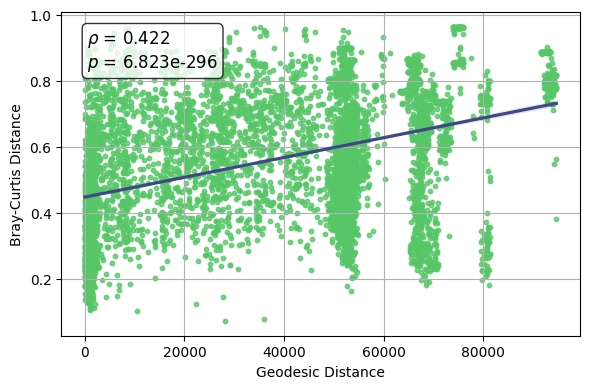

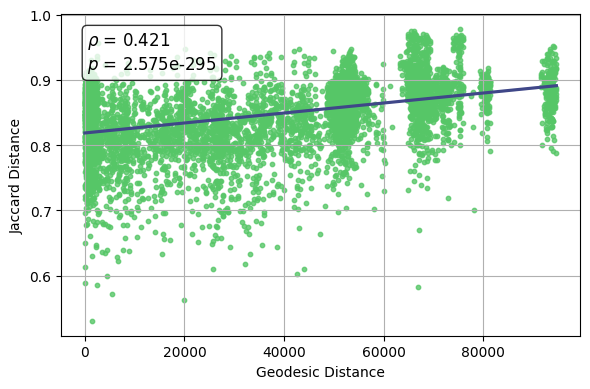

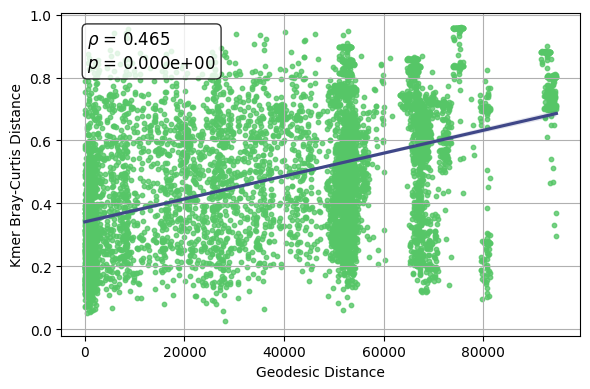

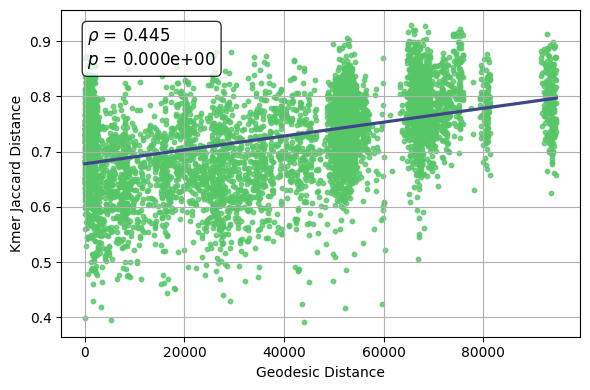

In [86]:
geodesic_path = 'geodesic_distance_ITS_ValaisLavaux/distance-matrix.tsv'

div_dir='valais_cm10000'
kmer_dir='valais_kmer_cm10000'

bray_curtis_path = f'{div_dir}/bray_curtis_distance_matrix/distance-matrix.tsv'
jaccard_path = f'{div_dir}/jaccard_distance_matrix/distance-matrix.tsv'
bray_curtis_kmer_path = f'{kmer_dir}/bray_curtis_distance_matrix/distance-matrix.tsv'
jaccard_kmer_path = f'{kmer_dir}/jaccard_distance_matrix/distance-matrix.tsv'

# Mantel test 
rho_bray, p_bray = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=bray_curtis_path,
    x_label='Geodesic Distance', y_label='Bray-Curtis Distance')

rho_jaccard, p_jaccard = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=jaccard_path,
    x_label='Geodesic Distance', y_label='Jaccard Distance')

rho_bray_kmer, p_bray_kmer = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=bray_curtis_kmer_path,
    x_label='Geodesic Distance', y_label='Kmer Bray-Curtis Distance')

rho_jaccard_kmer, p_jaccard_kmer = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=jaccard_kmer_path,
    x_label='Geodesic Distance', y_label='Kmer Jaccard Distance')

In [87]:
# results as df 
results = {'Test': ['Bray-Curtis', 'Jaccard', 'Kmer Bray-Curtis', 'Kmer Jaccard'],
    'Rho': [rho_bray, rho_jaccard, rho_bray_kmer, rho_jaccard_kmer],
    'p-val': [p_bray, p_jaccard, p_bray_kmer, p_jaccard_kmer]}

results_df = pd.DataFrame(results)

results_df

,Test,Rho,p-val
0,Bray-Curtis,0.421763,6.822868e-296
1,Jaccard,0.421388,2.574539e-295
2,Kmer Bray-Curtis,0.464684,0.000000e+00
3,Kmer Jaccard,0.444843,0.000000e+00


<hr>

# Compare only Chasselas samples


In [89]:
%%bash 

# Define the variable for the variety
variety="Chasselas"

# Define the plot directory based on the variety
plot_dir="./Valais_Chasselas"
echo "Processing variety: $variety"

# Create directory for the variety and navigate into it
mkdir -p "$plot_dir"
pushd "$plot_dir" > /dev/null

# Filter table and rep seqs for the specified variety
qiime feature-table filter-samples \
  --i-table /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/Valais_Lavaux23_filtered_table.qza \
  --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_Valais_and_Lavaux23.tsv \
  --p-where "[Variety]='$variety'" \
  --o-filtered-table must_harvest21_${variety}_filtered_table.qza

qiime feature-table filter-seqs \
  --i-data /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/Sven-denoising-test/ITS/revcomp-trimmed-denoised/with-adjusted-parameters/ITS-revcomp-trimmed-ER-0.05-denoised-trunc-190-PFA-4.0-maxee-4.0-rep-seqs.qza \
  --i-table must_harvest21_${variety}_filtered_table.qza \
  --o-filtered-data must_harvest21_${variety}_filtered_rep_seqs.qza


# Core diversity metrics
qiime diversity core-metrics \
  --i-table must_harvest21_${variety}_filtered_table.qza \
  --p-sampling-depth 10000 \
  --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_Valais_and_Lavaux23.tsv \
  --p-n-jobs 5 \
  --output-dir cm10000/

# Kmer diversity
qiime kmerizer core-metrics \
  --i-sequences must_harvest21_${variety}_filtered_rep_seqs.qza \
  --i-table must_harvest21_${variety}_filtered_table.qza \
  --p-sampling-depth 10000 \
  --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_Valais_and_Lavaux23.tsv \
  --p-n-jobs auto \
  --output-dir kmer_cm10000/


# Export all distance matrics for Mantel 
qiime tools export --input-path cm10000/bray_curtis_distance_matrix.qza --output-path cm10000/bray_curtis_distance_matrix
qiime tools export --input-path cm10000/jaccard_distance_matrix.qza --output-path cm10000/jaccard_distance_matrix
qiime tools export --input-path kmer_cm10000/bray_curtis_distance_matrix.qza --output-path kmer_cm10000/bray_curtis_distance_matrix
qiime tools export --input-path kmer_cm10000/jaccard_distance_matrix.qza --output-path kmer_cm10000/jaccard_distance_matrix

Processing variety: Chasselas
Saved FeatureTable[Frequency] to: must_harvest21_Chasselas_filtered_table.qza
Saved FeatureData[Sequence] to: must_harvest21_Chasselas_filtered_rep_seqs.qza
Saved FeatureTable[Frequency] to: cm10000/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: cm10000/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: cm10000/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: cm10000/evenness_vector.qza
Saved DistanceMatrix to: cm10000/jaccard_distance_matrix.qza
Saved DistanceMatrix to: cm10000/bray_curtis_distance_matrix.qza
Saved PCoAResults to: cm10000/jaccard_pcoa_results.qza
Saved PCoAResults to: cm10000/bray_curtis_pcoa_results.qza
Saved Visualization to: cm10000/jaccard_emperor.qzv
Saved Visualization to: cm10000/bray_curtis_emperor.qzv
Saved FeatureTable[Frequency] to: kmer_cm10000/rarefied_table.qza
Saved FeatureTable[Frequency] to: kmer_cm10000/kmer_table.qza
Saved SampleData[AlphaDiversity] to: kmer_cm10000/observed_features_vecto

### Mantel 

In [90]:
!ls 

geodesic_distance_ITS_ValaisLavaux  Valais_Lavaux23_filtered_rep_seqs.qza
Valais_Chasselas		    Valais_Lavaux23_filtered_table.qza
valais_cm10000			    Valais_Lavaux23_filtered_table.qzv
valais_kmer_cm10000


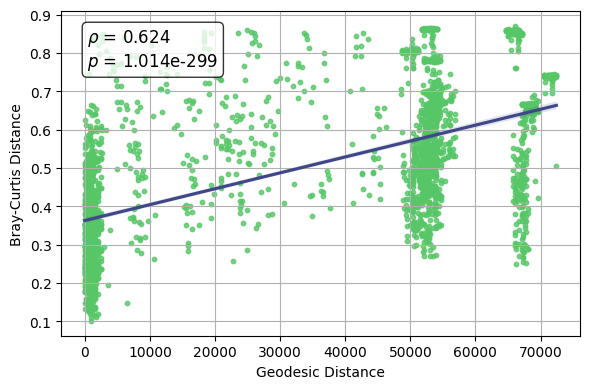

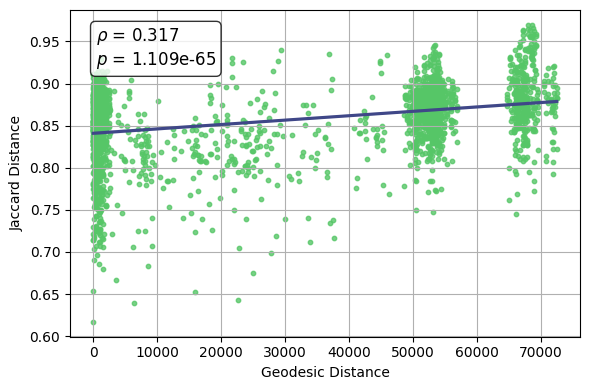

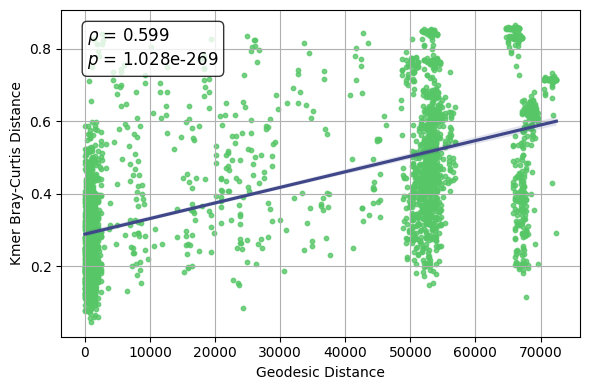

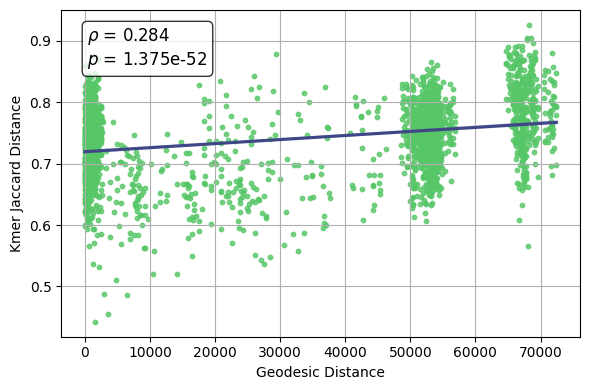

In [91]:
geodesic_path = '/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/spatio-temporal/valais/geodesic_distance_ITS_ValaisLavaux/distance-matrix.tsv'

div_dir='Valais_Chasselas/cm10000'
kmer_dir='Valais_Chasselas/kmer_cm10000'

bray_curtis_path = f'{div_dir}/bray_curtis_distance_matrix/distance-matrix.tsv'
jaccard_path = f'{div_dir}/jaccard_distance_matrix/distance-matrix.tsv'
bray_curtis_kmer_path = f'{kmer_dir}/bray_curtis_distance_matrix/distance-matrix.tsv'
jaccard_kmer_path = f'{kmer_dir}/jaccard_distance_matrix/distance-matrix.tsv'

# Mantel test 
rho_bray, p_bray = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=bray_curtis_path,
    x_label='Geodesic Distance', y_label='Bray-Curtis Distance')

rho_jaccard, p_jaccard = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=jaccard_path,
    x_label='Geodesic Distance', y_label='Jaccard Distance')

rho_bray_kmer, p_bray_kmer = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=bray_curtis_kmer_path,
    x_label='Geodesic Distance', y_label='Kmer Bray-Curtis Distance')

rho_jaccard_kmer, p_jaccard_kmer = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=jaccard_kmer_path,
    x_label='Geodesic Distance', y_label='Kmer Jaccard Distance')

In [92]:
# results as df 
results = {'Test': ['Bray-Curtis', 'Jaccard', 'Kmer Bray-Curtis', 'Kmer Jaccard'],
    'Rho': [rho_bray, rho_jaccard, rho_bray_kmer, rho_jaccard_kmer],
    'p-val': [p_bray, p_jaccard, p_bray_kmer, p_jaccard_kmer]}

results_df = pd.DataFrame(results)

results_df

,Test,Rho,p-val
0,Bray-Curtis,0.624288,1.014325e-299
1,Jaccard,0.316678,1.108681e-65
2,Kmer Bray-Curtis,0.598810,1.028347e-269
3,Kmer Jaccard,0.283865,1.374557e-52


<hr>

# Compare only Pinot samples


In [93]:
%%bash 

# Define the variable for the variety
variety="PinotNoir"

# Define the plot directory based on the variety
plot_dir="./Valais_PinotNoir"
echo "Processing variety: $variety"

# Create directory for the variety and navigate into it
mkdir -p "$plot_dir"
pushd "$plot_dir" > /dev/null

# Filter table and rep seqs for the specified variety
qiime feature-table filter-samples \
  --i-table /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/Valais_Lavaux23_filtered_table.qza \
  --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_Valais_and_Lavaux23.tsv \
  --p-where "[Variety]='$variety'" \
  --o-filtered-table must_harvest21_${variety}_filtered_table.qza

qiime feature-table filter-seqs \
  --i-data /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/Sven-denoising-test/ITS/revcomp-trimmed-denoised/with-adjusted-parameters/ITS-revcomp-trimmed-ER-0.05-denoised-trunc-190-PFA-4.0-maxee-4.0-rep-seqs.qza \
  --i-table must_harvest21_${variety}_filtered_table.qza \
  --o-filtered-data must_harvest21_${variety}_filtered_rep_seqs.qza


# Core diversity metrics
qiime diversity core-metrics \
  --i-table must_harvest21_${variety}_filtered_table.qza \
  --p-sampling-depth 10000 \
  --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_Valais_and_Lavaux23.tsv \
  --p-n-jobs 5 \
  --output-dir cm10000/

# Kmer diversity
qiime kmerizer core-metrics \
  --i-sequences must_harvest21_${variety}_filtered_rep_seqs.qza \
  --i-table must_harvest21_${variety}_filtered_table.qza \
  --p-sampling-depth 10000 \
  --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_Valais_and_Lavaux23.tsv \
  --p-n-jobs auto \
  --output-dir kmer_cm10000/


# Export all distance matrics for Mantel 
qiime tools export --input-path cm10000/bray_curtis_distance_matrix.qza --output-path cm10000/bray_curtis_distance_matrix
qiime tools export --input-path cm10000/jaccard_distance_matrix.qza --output-path cm10000/jaccard_distance_matrix
qiime tools export --input-path kmer_cm10000/bray_curtis_distance_matrix.qza --output-path kmer_cm10000/bray_curtis_distance_matrix
qiime tools export --input-path kmer_cm10000/jaccard_distance_matrix.qza --output-path kmer_cm10000/jaccard_distance_matrix

Processing variety: PinotNoir
Saved FeatureTable[Frequency] to: must_harvest21_PinotNoir_filtered_table.qza
Saved FeatureData[Sequence] to: must_harvest21_PinotNoir_filtered_rep_seqs.qza
Saved FeatureTable[Frequency] to: cm10000/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: cm10000/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: cm10000/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: cm10000/evenness_vector.qza
Saved DistanceMatrix to: cm10000/jaccard_distance_matrix.qza
Saved DistanceMatrix to: cm10000/bray_curtis_distance_matrix.qza
Saved PCoAResults to: cm10000/jaccard_pcoa_results.qza
Saved PCoAResults to: cm10000/bray_curtis_pcoa_results.qza
Saved Visualization to: cm10000/jaccard_emperor.qzv
Saved Visualization to: cm10000/bray_curtis_emperor.qzv
Saved FeatureTable[Frequency] to: kmer_cm10000/rarefied_table.qza
Saved FeatureTable[Frequency] to: kmer_cm10000/kmer_table.qza
Saved SampleData[AlphaDiversity] to: kmer_cm10000/observed_features_vecto

### Mantel 

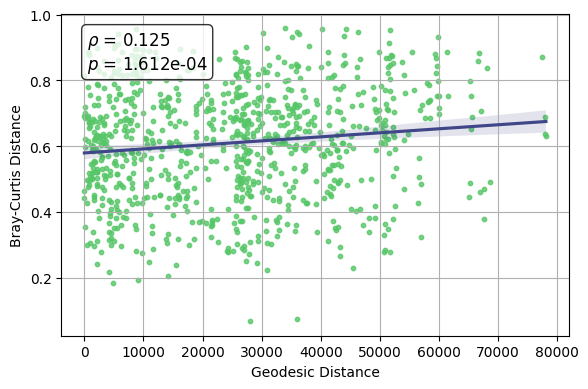

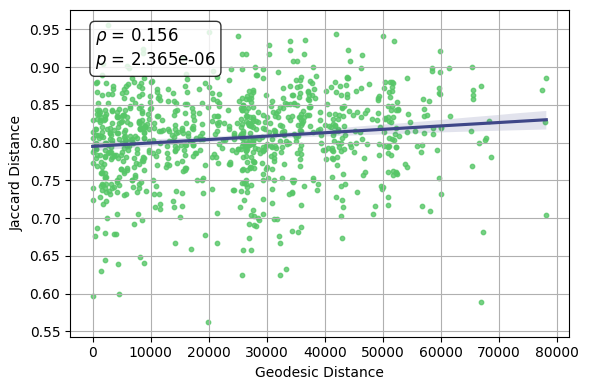

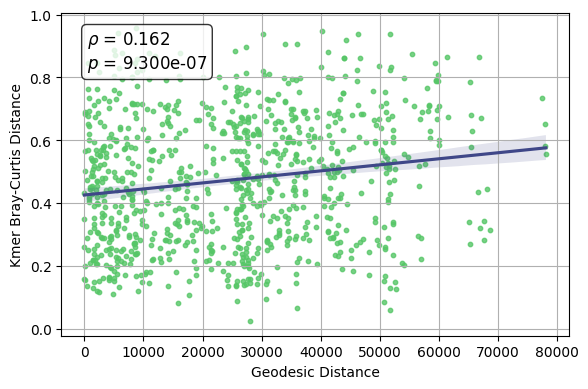

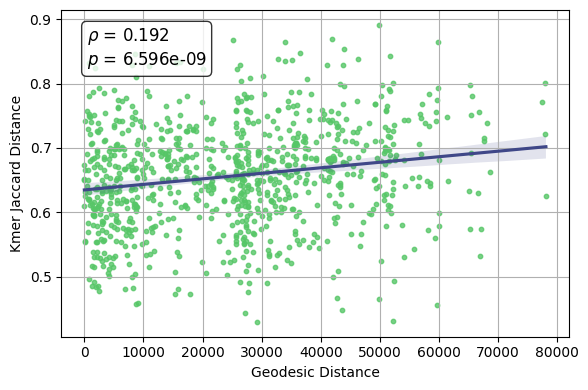

In [94]:
geodesic_path = '/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/spatio-temporal/valais/geodesic_distance_ITS_ValaisLavaux/distance-matrix.tsv'

div_dir='Valais_PinotNoir/cm10000'
kmer_dir='Valais_PinotNoir/kmer_cm10000'

bray_curtis_path = f'{div_dir}/bray_curtis_distance_matrix/distance-matrix.tsv'
jaccard_path = f'{div_dir}/jaccard_distance_matrix/distance-matrix.tsv'
bray_curtis_kmer_path = f'{kmer_dir}/bray_curtis_distance_matrix/distance-matrix.tsv'
jaccard_kmer_path = f'{kmer_dir}/jaccard_distance_matrix/distance-matrix.tsv'

# Mantel test 
rho_bray, p_bray = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=bray_curtis_path,
    x_label='Geodesic Distance', y_label='Bray-Curtis Distance')

rho_jaccard, p_jaccard = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=jaccard_path,
    x_label='Geodesic Distance', y_label='Jaccard Distance')

rho_bray_kmer, p_bray_kmer = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=bray_curtis_kmer_path,
    x_label='Geodesic Distance', y_label='Kmer Bray-Curtis Distance')

rho_jaccard_kmer, p_jaccard_kmer = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=jaccard_kmer_path,
    x_label='Geodesic Distance', y_label='Kmer Jaccard Distance')

In [95]:
# results as df 
results = {'Test': ['Bray-Curtis', 'Jaccard', 'Kmer Bray-Curtis', 'Kmer Jaccard'],
    'Rho': [rho_bray, rho_jaccard, rho_bray_kmer, rho_jaccard_kmer],
    'p-val': [p_bray, p_jaccard, p_bray_kmer, p_jaccard_kmer]}

results_df = pd.DataFrame(results)

results_df

,Test,Rho,p-val
0,Bray-Curtis,0.125242,1.611929e-04
1,Jaccard,0.156304,2.364850e-06
2,Kmer Bray-Curtis,0.162398,9.300075e-07
3,Kmer Jaccard,0.191517,6.596058e-09
